In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [24]:
#df = pd.read_csv("D://Data/sales_data_sample.csv", encoding='unicode_escape')
#print(df.info())




In [25]:
df = pd.read_csv("Social_Network.csv")
print(df.info())

df = df.drop("User ID", axis=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [26]:
lb_e = LabelEncoder()
df['Gender'] = lb_e.fit_transform(df['Gender'])
print(df["Gender"].unique())

X = df.drop("Purchased", axis=1)
y = df["Purchased"]

[1 0]


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train: ", X_train.shape[0])
print("X_test: ", X_test.shape[0])


X_train:  320
X_test:  80


In [28]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=3) # k=5

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)



from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[49,  3],
       [ 4, 24]], dtype=int64)

In [29]:
# Đánh giá hiệu suất của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình KNN:", accuracy)

Độ chính xác của mô hình KNN: 0.9125


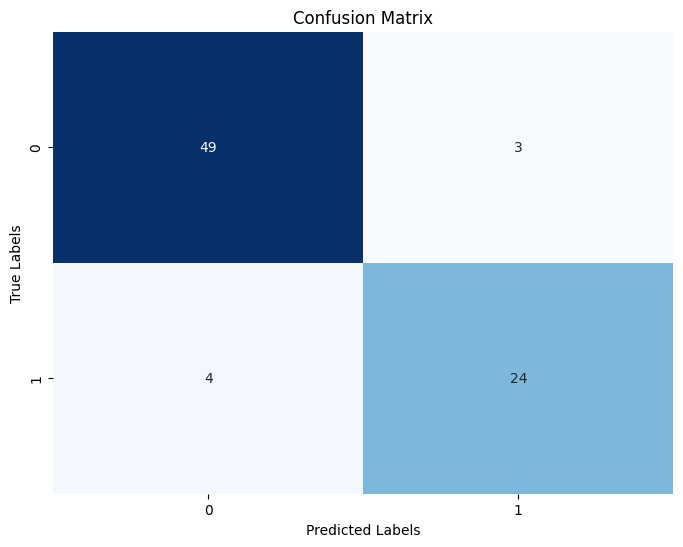

In [30]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [31]:

# Selecting the data for visualization
X_test_visualization = X_test.copy()
X_test_visualization['Actual Purchased'] = y_test
X_test_visualization['Predicted Purchased'] = y_pred

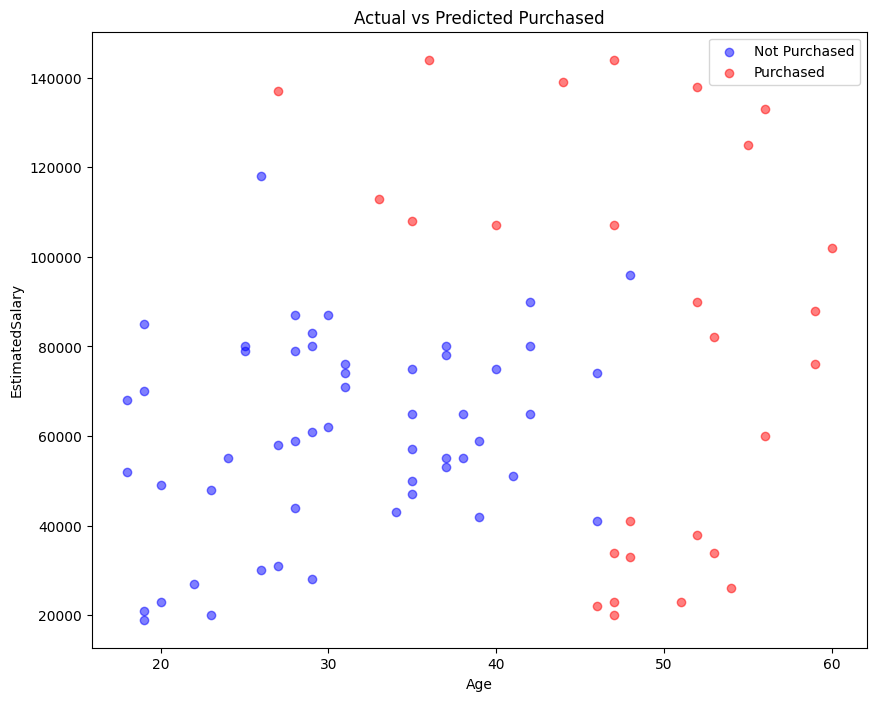

In [32]:

# Creating scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_test_visualization[X_test_visualization['Predicted Purchased'] == 0]['Age'], 
            X_test_visualization[X_test_visualization['Predicted Purchased'] == 0]['EstimatedSalary'], 
            color='blue', label='Not Purchased', alpha=0.5)
plt.scatter(X_test_visualization[X_test_visualization['Predicted Purchased'] == 1]['Age'], 
            X_test_visualization[X_test_visualization['Predicted Purchased'] == 1]['EstimatedSalary'], 
            color='red', label='Purchased', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Actual vs Predicted Purchased')
plt.legend()
plt.show()

In [33]:
#-----------------------------------------------
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Social_Network.csv")


df = df.drop("User ID", axis=1)

lb_e = LabelEncoder()
df['Gender'] = lb_e.fit_transform(df['Gender'])
print(df["Gender"].unique())

X = df.drop("Purchased", axis=1)
X.info()

y = df["Purchased"]
y.info()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train: ", X_train.shape[0])
print("X_test: ", X_test.shape[0])

scaler = StandardScaler()
trainX = scaler.fit_transform(X_train)
testX = scaler.transform(X_test)
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = [1,2, 3, 4, 5]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train_scaled, y_train)
    
    y_pred = knn.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the accuracy for current k value
    print("Độ chính xác của mô hình KNN với k =", k, " là:", accuracy)


[1 0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int32
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
dtypes: int32(1), int64(2)
memory usage: 7.9 KB
<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: Purchased
Non-Null Count  Dtype
--------------  -----
400 non-null    int64
dtypes: int64(1)
memory usage: 3.3 KB
X_train:  320
X_test:  80
Độ chính xác của mô hình KNN với k = 1  là: 0.8875
Độ chính xác của mô hình KNN với k = 2  là: 0.8375
Độ chính xác của mô hình KNN với k = 3  là: 0.9125
Độ chính xác của mô hình KNN với k = 4  là: 0.9125
Độ chính xác của mô hình KNN với k = 5  là: 0.925
